In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [2]:
df = pd.read_csv('adult_with_headers.csv')

In [3]:
df.shape

(32561, 15)

In [4]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(24)

In [8]:
df.drop_duplicates(inplace=True,ignore_index=True)

In [9]:
df.duplicated().sum()


np.int64(0)

In [10]:
# Identify categorical and numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

In [11]:
num_cols

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [12]:
cat_cols

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [13]:
# 3️ Scaling
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

In [14]:
scaled_standard = pd.DataFrame(scaler_standard.fit_transform(df[num_cols]), columns=[num_cols])
scaled_minmax = pd.DataFrame(scaler_minmax.fit_transform(df[num_cols]), columns=[f"{c}_minmax" for c in num_cols])

In [15]:
scaled_standard

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030390,-1.063569,1.134777,0.148292,-0.216743,-0.035664
1,0.836973,-1.008668,1.134777,-0.145975,-0.216743,-2.222483
2,-0.042936,0.245040,-0.420679,-0.145975,-0.216743,-0.035664
3,1.056950,0.425752,-1.198407,-0.145975,-0.216743,-0.035664
4,-0.776193,1.408066,1.134777,-0.145975,-0.216743,-0.035664
...,...,...,...,...,...,...
32532,-0.849519,0.639678,0.745913,-0.145975,-0.216743,-0.197650
32533,0.103716,-0.335436,-0.420679,-0.145975,-0.216743,-0.035664
32534,1.423579,-0.358779,-0.420679,-0.145975,-0.216743,-0.035664
32535,-1.216148,0.110930,-0.420679,-0.145975,-0.216743,-1.655530


In [16]:
scaled_minmax

,age_minmax,fnlwgt_minmax,education_num_minmax,capital_gain_minmax,capital_loss_minmax,hours_per_week_minmax
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959
...,...,...,...,...,...,...
32532,0.136986,0.166404,0.733333,0.000000,0.0,0.377551
32533,0.315068,0.096500,0.533333,0.000000,0.0,0.397959
32534,0.561644,0.094827,0.533333,0.000000,0.0,0.397959
32535,0.068493,0.128499,0.533333,0.000000,0.0,0.193878


In [17]:
# 4️ Encoding
low_cat_cols = [col for col in cat_cols if df[col].nunique() <= 5]
high_cat_cols = [col for col in cat_cols if df[col].nunique() > 5]

In [18]:
df = pd.get_dummies(df, columns=low_cat_cols, drop_first=True)

In [19]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,income_ >50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,2174,0,40,United-States,False,False,False,True,True,False
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,0,0,13,United-States,False,False,False,True,True,False
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,0,0,40,United-States,False,False,False,True,True,False
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,0,0,40,United-States,False,True,False,False,True,False
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,0,0,40,Cuba,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,0,0,38,United-States,False,False,False,True,False,False
32533,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,0,0,40,United-States,False,False,False,True,True,True
32534,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,0,0,40,United-States,False,False,False,True,False,False
32535,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,0,0,20,United-States,False,False,False,True,True,False


In [20]:
le = LabelEncoder()
for col in high_cat_cols:
    df[col] = le.fit_transform(df[col])

In [21]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,income_ >50K
0,39,7,77516,9,13,4,1,1,2174,0,40,39,False,False,False,True,True,False
1,50,6,83311,9,13,2,4,0,0,0,13,39,False,False,False,True,True,False
2,38,4,215646,11,9,0,6,1,0,0,40,39,False,False,False,True,True,False
3,53,4,234721,1,7,2,6,0,0,0,40,39,False,True,False,False,True,False
4,28,4,338409,9,13,2,10,5,0,0,40,5,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,27,4,257302,7,12,2,13,5,0,0,38,39,False,False,False,True,False,False
32533,40,4,154374,11,9,2,7,0,0,0,40,39,False,False,False,True,True,True
32534,58,4,151910,11,9,6,1,4,0,0,40,39,False,False,False,True,False,False
32535,22,4,201490,11,9,4,1,3,0,0,20,39,False,False,False,True,True,False


In [22]:
#  Feature Engineering

df['age_group'] = pd.cut(df['age'], bins=[0, 25, 45, 65, 100], labels=['Young', 'Mid-Age', 'Senior', 'Elder'])
df['work_experience_level'] = pd.cut(df['hours_per_week'], bins=[0, 25, 40, 60, 100], labels=['Low', 'Moderate', 'High', 'Extreme'])


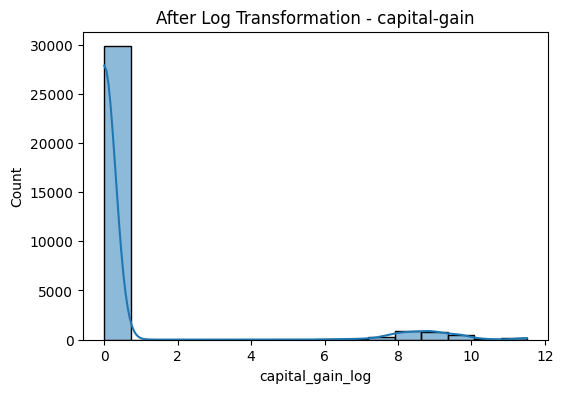

In [23]:
# Log Transformation

df['capital_gain_log'] = np.log1p(df['capital_gain'])

plt.figure(figsize=(6,4))
sns.histplot(df['capital_gain_log'], kde=True)
plt.title("After Log Transformation - capital-gain")
plt.show()


In [24]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,native_country,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,income_ >50K,age_group,work_experience_level,capital_gain_log
0,39,7,77516,9,13,4,1,1,2174,0,...,39,False,False,False,True,True,False,Mid-Age,Moderate,7.684784
1,50,6,83311,9,13,2,4,0,0,0,...,39,False,False,False,True,True,False,Senior,Low,0.000000
2,38,4,215646,11,9,0,6,1,0,0,...,39,False,False,False,True,True,False,Mid-Age,Moderate,0.000000
3,53,4,234721,1,7,2,6,0,0,0,...,39,False,True,False,False,True,False,Senior,Moderate,0.000000
4,28,4,338409,9,13,2,10,5,0,0,...,5,False,True,False,False,False,False,Mid-Age,Moderate,0.000000


In [25]:
## two new features
df['hours_per_age'] = df['hours_per_week'] / df['age']
df['capital_net'] = df['capital_gain'] - df['capital_loss']


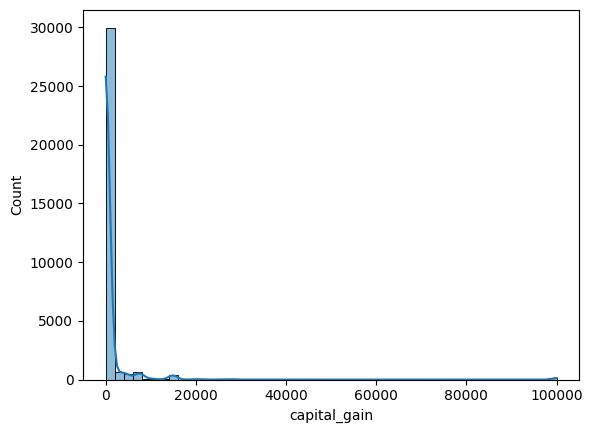

In [26]:
# skewness
sns.histplot(df['capital_gain'], bins=50, kde=True)
plt.show()

# Apply log transformation to reduce skewness
df['capital_gain_log'] = np.log1p(df['capital_gain'])


One-Hot Encoding (OHE)
Pros:
Doesn’t assume any order among categories.
Good for linear models (like Logistic Regression).
Easy to interpret.
Cons:
Increases number of columns (high dimensionality).
Creates sparse data (lots of zeros).
Can be inefficient for tree-based models.

Label Encoding (LE)
Pros:
Simple and compact (no extra columns).
Memory-efficient.
Works well with tree-based models (Decision Trees, Random Forest).
Cons:
Imposes a false order among categories.
Not suitable for linear models.
Harder to interpret.